Performing A/B testing on E-commerce website to help the company understand if they should implement the new page or keep the old page.

In [1]:
#Data cleaning
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
import random
random.seed(42) 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ecom.csv")
df.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [3]:
df.columns = ["user_id", "timestamp", "group", "landing_page", "converted"]
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [4]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of unique users: {df.user_id.nunique()}')

Number of rows: 294478
Number of unique users: 290584


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [7]:
n_treat = df[df["group"] == "treatment"].shape[0]
n_new_page = df[df["landing_page"] == "new_page"].shape[0]
difference = n_treat - n_new_page

pd.DataFrame({
    'N treatment': [n_treat],
    'N new_page': [n_new_page],
    'Difference': [difference]
})

,N treatment,N new_page,Difference
0,147276,147239,37


#Since treatement and new age numbers doesn't match , means we need to explore the data more.


In [9]:
df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")]

,user_id,timestamp,group,landing_page,converted
308,857184,34:59.8,treatment,old_page,0
327,686623,26:40.7,treatment,old_page,0
357,856078,29:30.4,treatment,old_page,0
685,666385,11:54.8,treatment,old_page,0
713,748761,47:44.4,treatment,old_page,0
...,...,...,...,...,...
293773,688144,34:50.5,treatment,old_page,1
293817,876037,15:09.0,treatment,old_page,1
293917,738357,37:55.7,treatment,old_page,0
294014,813406,25:33.2,treatment,old_page,0


In [10]:
df_mismatch = df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")
               |(df["group"] == "control") & (df["landing_page"] == "new_page")]

n_mismatch = df_mismatch.shape[0]

percent_mismatch = round(n_mismatch / len(df) * 100, 2)
print(f'Number of mismatched rows: {n_mismatch} rows')
print(f'Percent of mismatched rows: {percent_mismatch} percent')

Number of mismatched rows: 3893 rows
Percent of mismatched rows: 1.32 percent


In [11]:
df2 = df[(df["group"] == "treatment") & (df["landing_page"] == "new_page")
        |(df["group"] == "control") & (df["landing_page"] == "old_page")]

len(df2)

290585

In [12]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [13]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [14]:
#Again checking if rows are correct
df_mismatch = df2[(df2["group"] == "treatment") & (df2["landing_page"] == "old_page")
               |(df2["group"] == "control") & (df2["landing_page"] == "new_page")]

n_mismatch = df_mismatch.shape[0]

percent_mismatch = round(n_mismatch / len(df2) * 100, 2)
print(f'Number of mismatched rows: {n_mismatch} rows')
print(f'Percent of mismatched rows: {percent_mismatch} percent')

Number of mismatched rows: 0 rows
Percent of mismatched rows: 0.0 percent


In [15]:
df2.user_id.nunique()

290584

In [16]:
len(df2) - df2.user_id.nunique()

1

In [17]:
df2[df2.duplicated("user_id") == True]   #Duplicated row

,user_id,timestamp,group,landing_page,converted
2893,773192,55:59.6,treatment,new_page,0


In [18]:
df2 = df2.drop_duplicates("user_id") 

In [19]:
len(df2) - df2.user_id.nunique()

0

In [20]:
#Finding probablity
df2.converted.mean() * 100 #probablity that user converted the page despite landing on initial page

11.959708724499627

In [21]:
#Probablity that individual was in control group by but converted and vice versa
df2['user_id'] = df2['user_id'].astype(str)
result = df2.groupby("group").mean(numeric_only=True) * 100
print(result)

           converted
group               
control    12.038630
treatment  11.880807


In [22]:
#probability that an individual received the new page
pd.DataFrame(df2.landing_page.value_counts(normalize = True) * 100)

,proportion
landing_page,
new_page,50.006194
old_page,49.993806


Since we can not conclude just by the probablity so we will perform A/B testing. 
considering that we need to conclude around the data given, we assume that the old page is better up until the new page proves to be much better at a Type I error rate of 5%. 

In [24]:
#sampling distribution
means_diff = []
size = df.shape[0]
for _ in range(10000):
    sample = df2.sample(size, replace = True)
    control_mean = sample[sample["group"] == "control"]["converted"].mean()
    treat_mean = sample[sample["group"] == "treatment"]["converted"].mean()
    means_diff.append(treat_mean - control_mean)

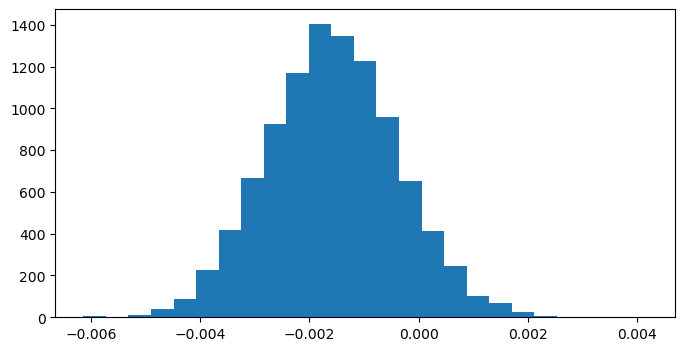

In [25]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(means_diff, bins = 25)
plt.show()

In [26]:
means_diff = np.array(means_diff)
null_vals = np.random.normal(0, means_diff.std(), means_diff.size)

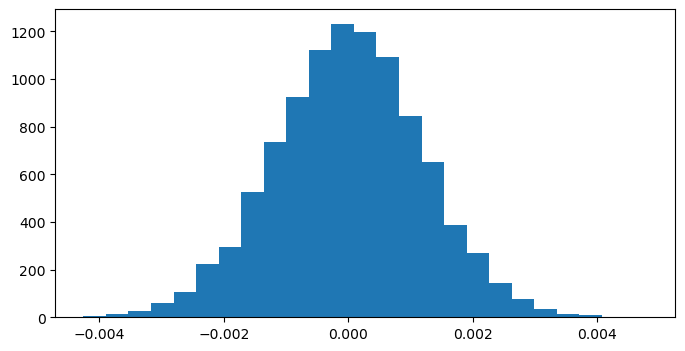

In [27]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_vals, bins = 25)
plt.show()

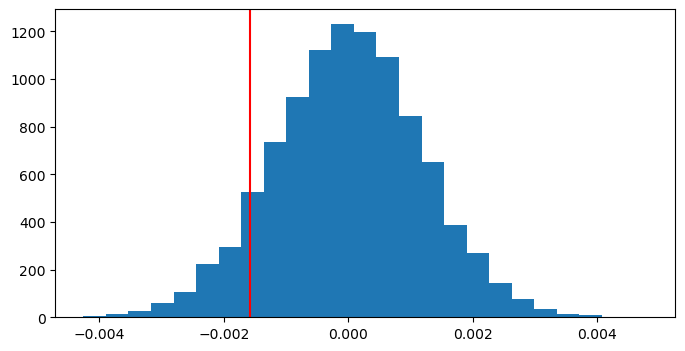

In [28]:
control_mean = df2[df2["group"] == "control"]["converted"].mean()
treat_mean = df2[df2["group"] == "treatment"]["converted"].mean()
obs_diff = treat_mean - control_mean

plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_vals, bins = 25)
plt.axvline(obs_diff, c='red')
plt.show()

In [29]:
(null_vals > obs_diff).mean()  #p value

0.91

Since this value is greater than alpha , we can not ignore null. This tells that the newer page has less significance

USING BUILT-INs

In [31]:
import statsmodels.api as sm

convert_old = df2[(df2["converted"] == 1) & (df2["landing_page"] == "old_page")]['user_id'].nunique()
convert_new = df2[(df2["converted"] == 1) & (df2["landing_page"] == "new_page")]['user_id'].nunique()
n_old = df2[df["landing_page"] == "old_page"]['user_id'].nunique()
n_new = df2[df["landing_page"] == "new_page"]['user_id'].nunique()

In [32]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [33]:
z_score, p_value 

(-1.3109241984234394, 0.9050583127590245)

In [ ]:
Here As well looking at the p-value, we can conclude that null can Not be rejected

REGRESSION


In [35]:
df2["intercept"] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,11:48.6,control,old_page,0,1
1,804228,01:45.2,control,old_page,0,1
2,661590,55:06.2,treatment,new_page,0,1
3,853541,28:03.1,treatment,new_page,0,1
4,864975,52:26.2,control,old_page,1,1


In [36]:
df2["ab_page"] = df2.group.apply(lambda x: 1 if (x == "treatment") else 0)
df2.head()   #1:Individual receives treatment
            #0: Individual receives control

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,11:48.6,control,old_page,0,1,0
1,804228,01:45.2,control,old_page,0,1,0
2,661590,55:06.2,treatment,new_page,0,1,1
3,853541,28:03.1,treatment,new_page,0,1,1
4,864975,52:26.2,control,old_page,1,1,0


In [37]:
model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:               8.077e-06
Time:                        18:32:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [38]:
countries = pd.read_csv("countries.csv")
countries.head()

,id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
countries.columns = ["user_id", "country"]
countries["user_id"] = countries["user_id"].astype(str)
df3 = df2.merge(countries, on = "user_id", how = "left")
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,11:48.6,control,old_page,0,1,0,US
1,804228,01:45.2,control,old_page,0,1,0,US
2,661590,55:06.2,treatment,new_page,0,1,1,US
3,853541,28:03.1,treatment,new_page,0,1,1,US
4,864975,52:26.2,control,old_page,1,1,0,US


In [40]:
#create dummy for country and landing page cols.

df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3[['new_page','old_page']] = pd.get_dummies(df3['landing_page'])
df3.head()   

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,new_page,old_page
0,851104,11:48.6,control,old_page,0,1,0,US,False,False,True,False,True
1,804228,01:45.2,control,old_page,0,1,0,US,False,False,True,False,True
2,661590,55:06.2,treatment,new_page,0,1,1,US,False,False,True,True,False
3,853541,28:03.1,treatment,new_page,0,1,1,US,False,False,True,True,False
4,864975,52:26.2,control,old_page,1,1,0,US,False,False,True,False,True


In [41]:
#Finding relationship between country and conversion
pd.pivot_table(data = df3, index = "country", values = "converted").sort_values(by = "converted", ascending = False) * 100


,converted
country,
UK,12.059449
US,11.954680
CA,11.531830


In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df3['UK'] = df3['UK'].astype(int)
df3['US'] = df3['US'].astype(int)
df3['intercept'] = 1

# Check the data types after conversion
print(df3[['ab_page', 'UK', 'US', 'converted', 'intercept']].dtypes)

# Fit the logistic regression model
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US']])
result = model.fit()
print(result.summary())


ab_page      int64
UK           int32
US           int32
converted    int64
intercept    int64
dtype: object
Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:               2.323e-05
Time:                        18:32:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [43]:
np.exp(result.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

All three methods resulted in the same conclusion: the treatment has no impact. That means that the Newer page has no significance impact. 